In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
#importing sms-spam-message detection dataset
df = pd.read_csv("data/datasets_483_982_spam.csv", encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#drop nan values columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [5]:
#rename columns
df.rename(columns={"v1":"label","v2":"messages"}, inplace=True)

In [6]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
len(df)

5572

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
#creat a new column length for visualizing
df["len"] = df["messages"].apply(len)

In [11]:
df.head()

,label,messages,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
#check the max length message
df["len"].max()

910

In [13]:
#print message
df[df["len"]==910]["messages"].loc[1084]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

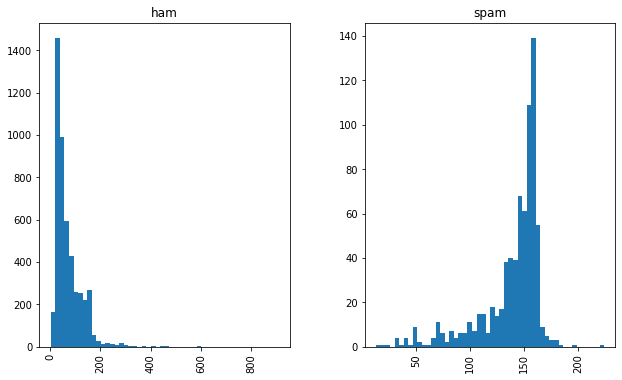

In [14]:
df.hist(column="len", by="label",bins=50, figsize=(10,6));

In [15]:
#droping length column
df.drop("len", axis=1, inplace=True)

In [16]:
#check is there any blank message
blank = []

for ind, lb, mess in df.itertuples():
    if type(mess) == str:
        if mess.isspace():
            blank.append(ind)

In [17]:
blank

[]

In [18]:
ps = PorterStemmer()
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#creating a function that removes punctuation from string and stopwords
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    word = [ps.stem(word) for word in clean_mess]
    word = " ".join(word)
    return word

In [20]:
mess = "Sample message! Notice: it has punctuation.."

In [21]:
text_process(mess)

'sampl messag notic punctuat'

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#split data
X = df["messages"]
y = df["label"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
#importing tfidfvector, Pipeline and model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 

In [28]:
#creat pipeline that takes vector and model

model = Pipeline([("tfidf", TfidfVectorizer(analyzer=text_process)), ("clf", MultinomialNB())])

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x0000027B51DC3CA0>)),
                ('clf', MultinomialNB())])

In [30]:
#importing classification metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
y_preds = model.predict(X_test)

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1453
        spam       0.95      0.82      0.88       219

    accuracy                           0.97      1672
   macro avg       0.96      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



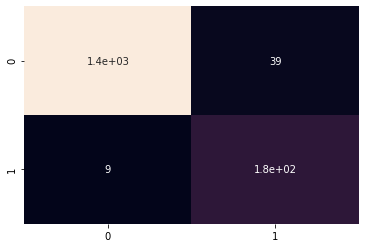

In [33]:
conf = confusion_matrix(y_preds, y_test)
sns.heatmap(conf, annot=True, cbar=False);

In [34]:
print(accuracy_score(y_test, y_preds))

0.9712918660287081


In [46]:
#let's predict a message

mess = X_test.iloc[1]
mess

'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones'

In [47]:
model.predict([mess])[0]

'ham'

In [4]:
#importing pickle library for saving of model
import pickle
# pickle.dump(model, open("spam-message-detection.pkl", "wb"))

In [5]:
#load model
model = pickle.load(open("spam-message-detection.pkl","rb"))

In [6]:
model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x0000022EE2440CA0>)),
                ('clf', LogisticRegression())])

In [43]:
model.predict(["You just won a Money prize of 100000. plz submit your details Terms&condition apply."])

array(['spam'], dtype='<U4')

In [47]:
df.tail()

,label,messages
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [70]:
mes = df["messages"].loc[5566]

In [38]:
mess = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [55]:
mes

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [64]:
df[df["label"]=="spam"]["messages"]

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: messages, Length: 747, dtype: object

In [71]:
mes

'REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode'

In [75]:
df.shape[0]

5572

In [76]:
import re

In [78]:
from nltk.stem import PorterStemmer

In [79]:
ps = PorterStemmer()

In [83]:
ps.stem(m)

AttributeError: 'list' object has no attribute 'lower'

In [82]:
m = text_process(mes)

In [9]:
import re

In [11]:
for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.messages[i])
    mess = message.lower()

In [12]:
mess

'rofl  its true to its name'

In [20]:
mes = df["messages"].loc[5570]

In [14]:
mes = 'REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode'

In [15]:
from nltk.stem import PorterStemmer

In [16]:
ps = PorterStemmer()

In [21]:
ps.stem(mes)

"the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for fre"

In [22]:
mes

"The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"

In [27]:
tfidf = TfidfVectorizer()

In [28]:
X = tfidf.fit_transform(corpus).toarray()

In [31]:
X.shape

(5572, 6221)

In [32]:
len(df)

5572

In [33]:
df.shape

(5572, 2)

In [49]:
y = pd.get_dummies(df['label'],drop_first=True)
# y = y.iloc[:, 1].values

In [48]:
y.iloc[:,1].values.shape

(5572,)

In [58]:
y.iloc[:,0].values

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [59]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
df.shape

(5572, 2)

In [61]:
len(df)

5572

In [64]:
df.iloc[:,0].values

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [11]:
df[df["label"]=="spam"]["messages"]

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: messages, Length: 747, dtype: object

In [68]:
df["messages"].loc[5567]

'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [23]:
mes = df["messages"].iloc[5567]

In [8]:
import re

In [9]:
pattern = re.compile(r"^a")

In [23]:
match = pattern.finditer(mes)

In [24]:
for matches in match:
    print(matches)

In [65]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    word = [ps.stem(word) for word in clean_mess]
    word = " ".join(word)
    return word

In [66]:
ms = text_process(mes)

In [61]:
m = " ".join(ms)

In [67]:
ms

'2nd time tri 2 contact u U å£750 pound prize 2 claim easi call 087187272008 now1 10p per minut btnationalr'

In [29]:
ps.stem(m)

'2nd time tried 2 contact u u å£750 pound prize 2 claim easy call 087187272008 now1 10p per minute btnationalr'

In [31]:
df.shape[0]

5572

In [126]:
df[df["messages"]=='Carlos']

,label,messages


In [138]:
message = []
for i in range(0,len(X)):
    nopunc = [char for char in X[i] if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    words = nopunc.lower()
    words = words.split()
    clean_mess = [word for word in words if word not in set(stopwords.words('english'))]
    word = [ps.stem(word) for word in clean_mess]
    word = " ".join(word)
    message.append(word)

In [139]:
message

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah dont think goe usf live around though',
 'freemsg hey darl 3 week word back id like fun still tb ok xxx std chg send å£150 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea å£900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 'six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6day 16 tsandc appli repli hl 4 info',
 'ur

In [131]:
df["messages"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: messages, Length: 5572, dtype: object

In [128]:
df.shape

(5572, 2)

In [82]:
tfidf = TfidfVectorizer(analyzer=text_process)

In [100]:
X_train_scaled = tfidf.fit_transform(X_train).toarray()

In [165]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [166]:
model.fit(X_train_scaled, y_train)

MultinomialNB()

In [172]:
mes = tfidf.fit_transform(["you won a credit of 10000000$"]).toarray()

In [168]:
mes = "you won a credit of 1000000$"

In [173]:
model.predict(mes)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 82 is different from 5)

In [152]:
import pickle
model = pickle.load(open("spam-message-detection.pkl","rb"))

In [148]:
model

MultinomialNB()

In [153]:
tfidf = pickle.load(open("tfidf-vector.pkl", "rb"))

In [162]:
mes = tfidf.transform(["you won a credit of 10000000$"]).toarray()

In [163]:
mes

array([[0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136]])

In [164]:
model.predict(mes)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8038 is different from 5)